In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pylab import rcParams
from pandas import Series
from numpy import log

In [2]:
df = pd.read_csv("datasets_302666_618181_AAPL.csv")

In [3]:
df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0  8/15/2018  209.220001  210.740005  208.330002  210.240005  207.027420   
1  8/16/2018  211.750000  213.809998  211.470001  213.320007  210.060333   
2  8/17/2018  213.440002  217.949997  213.160004  217.580002  214.255234   
3  8/20/2018  218.100006  219.179993  215.110001  215.460007  212.167633   
4  8/21/2018  216.800003  217.190002  214.029999  215.039993  211.754028   

     Volume  
0  28807600  
1  28500400  
2  35427000  
3  30287700  
4  26159800

In [4]:
from pandas.tseries.offsets import BDay

In [5]:
df.shape

(251, 7)

In [6]:
df_date = df[['Date','Volume']]

In [7]:
date1 = pd.date_range(start = '8/15/2018',end = '8/14/2019',freq = BDay())

In [8]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [10]:
date = pd.date_range(start = '8/15/2018',end = '8/14/2019',freq = us_bd)

In [11]:
date

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [12]:
df_date['Time_Stamp'] = pd.DataFrame(date, columns = ['Date'])

In [13]:
df_date.head()

Date    Volume Time_Stamp
0  8/15/2018  28807600 2018-08-15
1  8/16/2018  28500400 2018-08-16
2  8/17/2018  35427000 2018-08-17
3  8/20/2018  30287700 2018-08-20
4  8/21/2018  26159800 2018-08-21

In [14]:
df_date.tail()

Date    Volume Time_Stamp
246   8/8/2019  27009500 2019-08-08
247   8/9/2019  24619700 2019-08-09
248  8/12/2019  22474900 2019-08-12
249  8/13/2019  47218500 2019-08-13
250  8/14/2019  36453100 2019-08-14

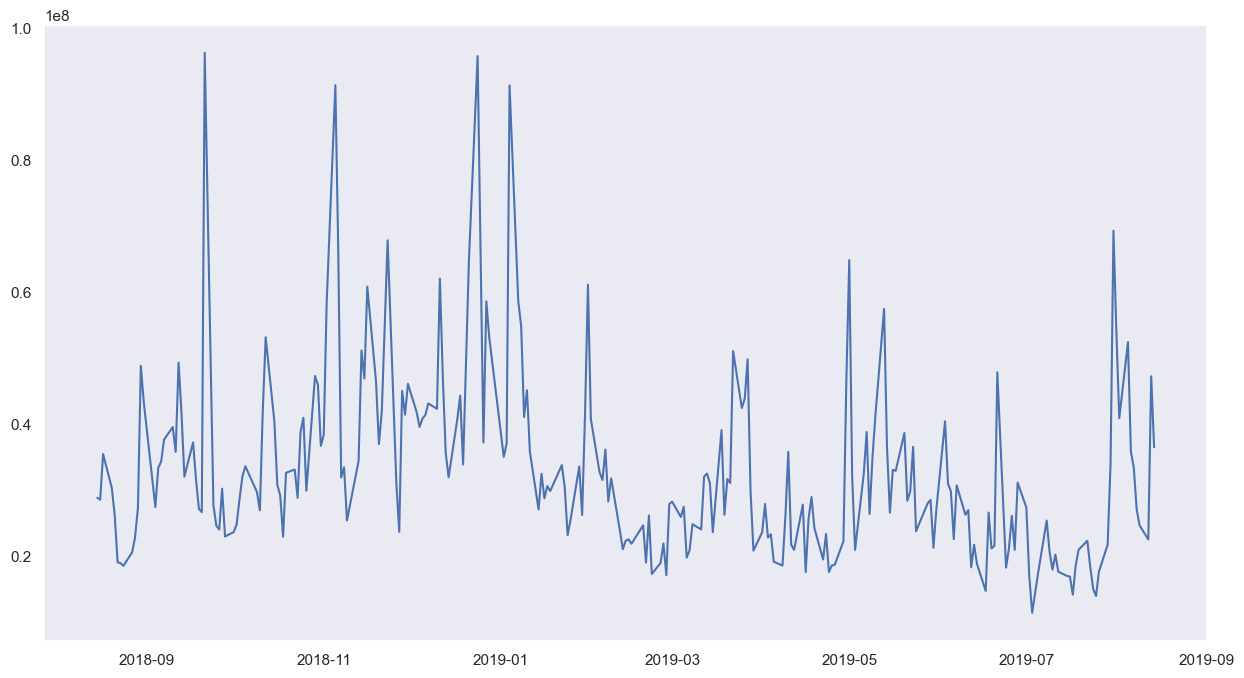

In [15]:
rcParams['figure.figsize'] = 15,8

plt.plot(df_date['Time_Stamp'], df_date['Volume']);
plt.grid()

In [16]:
df_date.describe()

Volume
count  2.510000e+02
mean   3.289967e+07
std    1.385336e+07
min    1.136200e+07
25%    2.329740e+07
50%    2.985580e+07
75%    3.927970e+07
max    9.624670e+07

In [17]:
df_final = pd.read_csv("datasets_302666_618181_AAPL.csv",parse_dates = True, squeeze = True,
                      index_col = 0)


In [18]:
df_final.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-15  209.220001  210.740005  208.330002  210.240005  207.027420   
2018-08-16  211.750000  213.809998  211.470001  213.320007  210.060333   
2018-08-17  213.440002  217.949997  213.160004  217.580002  214.255234   
2018-08-20  218.100006  219.179993  215.110001  215.460007  212.167633   
2018-08-21  216.800003  217.190002  214.029999  215.039993  211.754028   

              Volume  
Date                  
2018-08-15  28807600  
2018-08-16  28500400  
2018-08-17  35427000  
2018-08-20  30287700  
2018-08-21  26159800

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


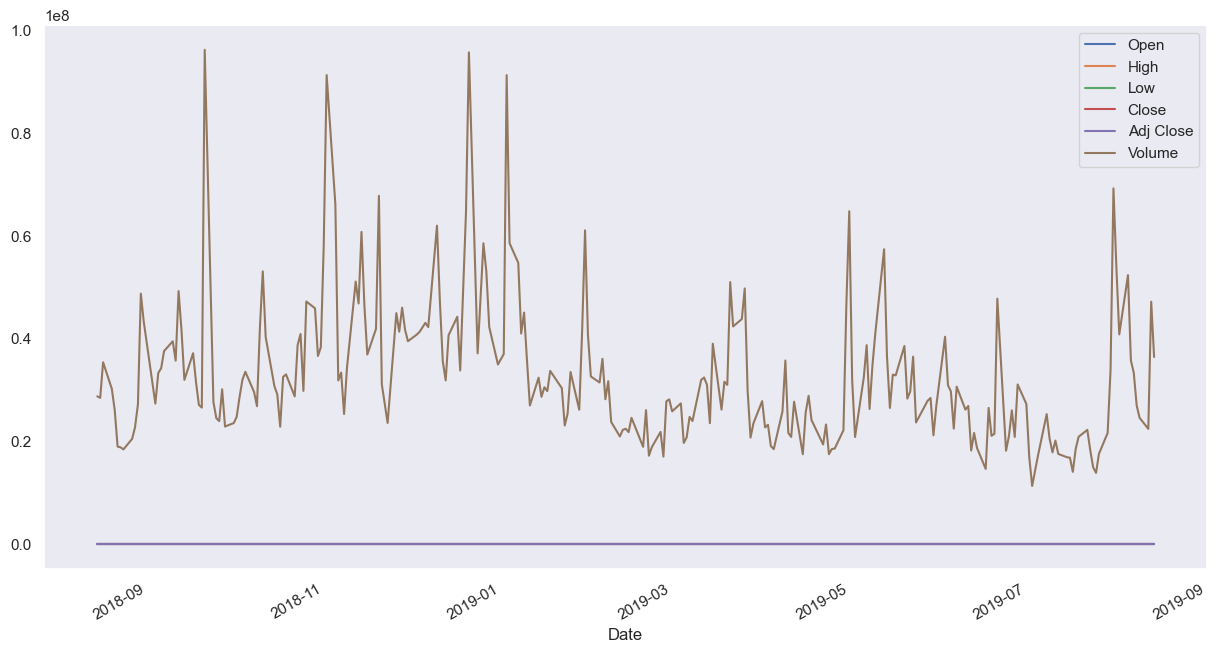

In [20]:
rcParams['figure.figsize'] = 15,8

df_final.plot();
plt.grid()

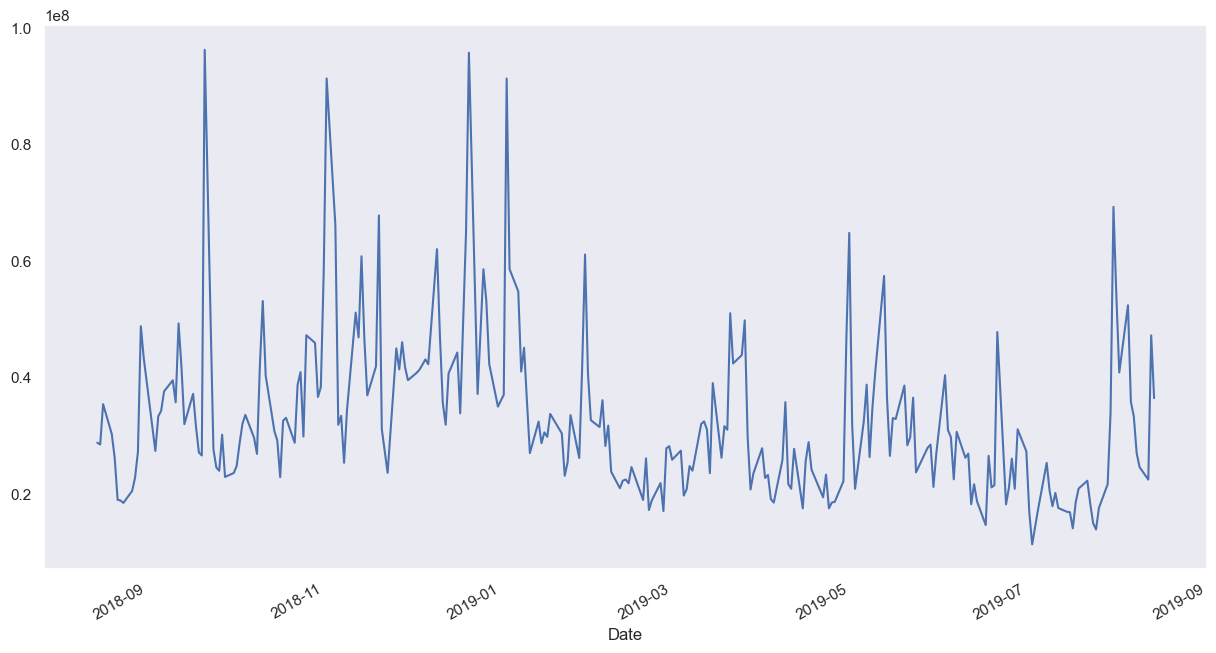

In [21]:
rcParams['figure.figsize'] = 15,8

df_final['Volume'].plot();
plt.grid()

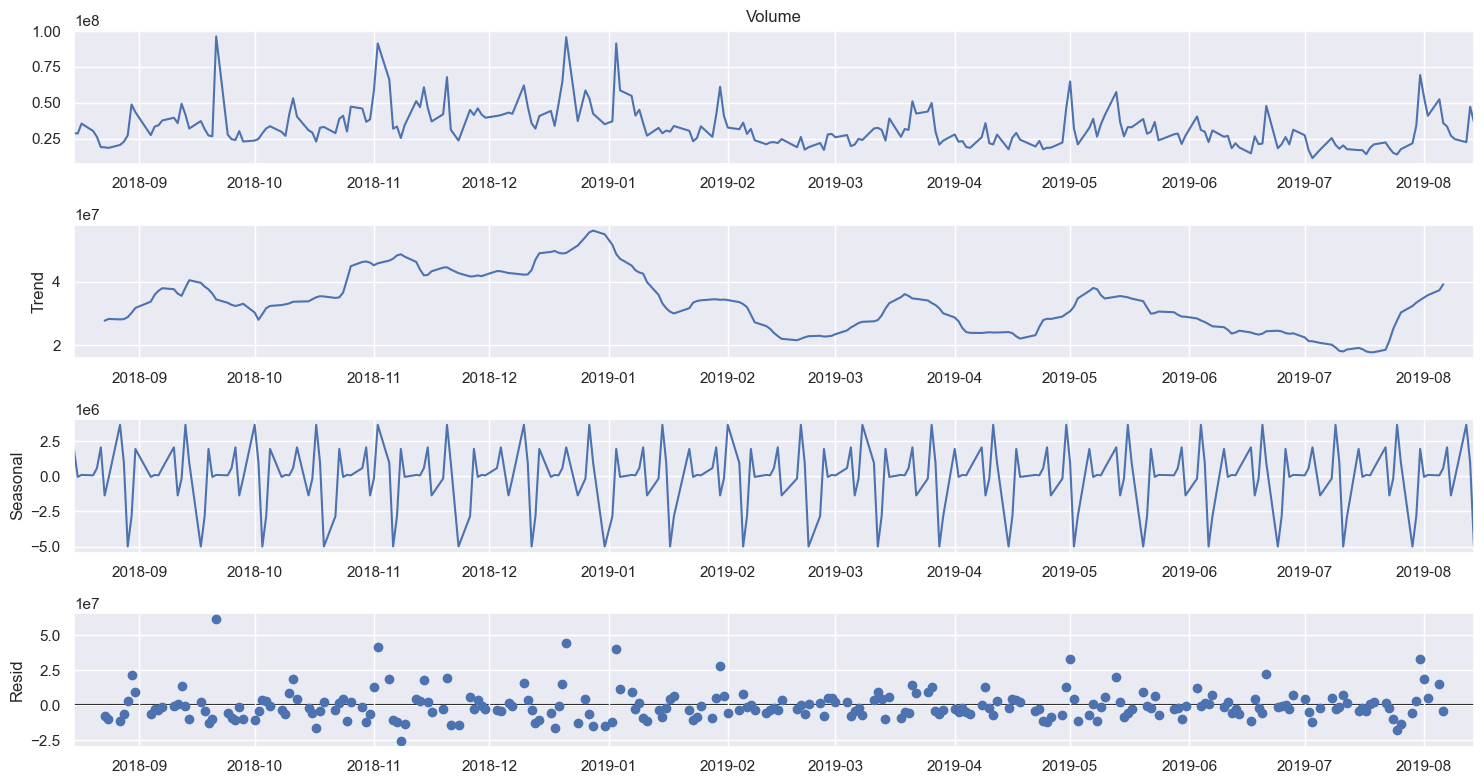

In [22]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
Decomposition = seasonal_decompose(df_final['Volume'],period = 12)

Decomposition.plot();
plt.show()

In [23]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_final['Volume'])

0.13804147049471416

# plot the box plot 'Open' variable with respect to the different years

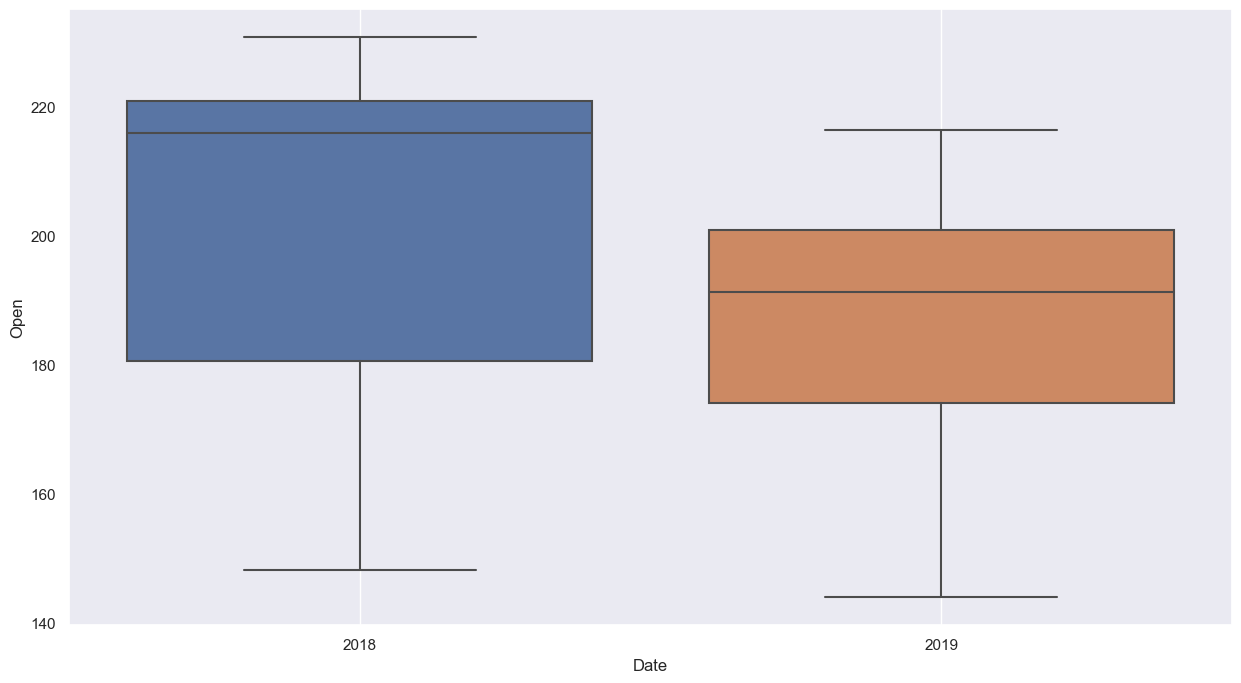

In [24]:
sns.boxplot(x = df_final.index.year, y = df_final['Open'])
plt.grid()

# plot the boxplot of the 'Open' variable with respect to the month of different

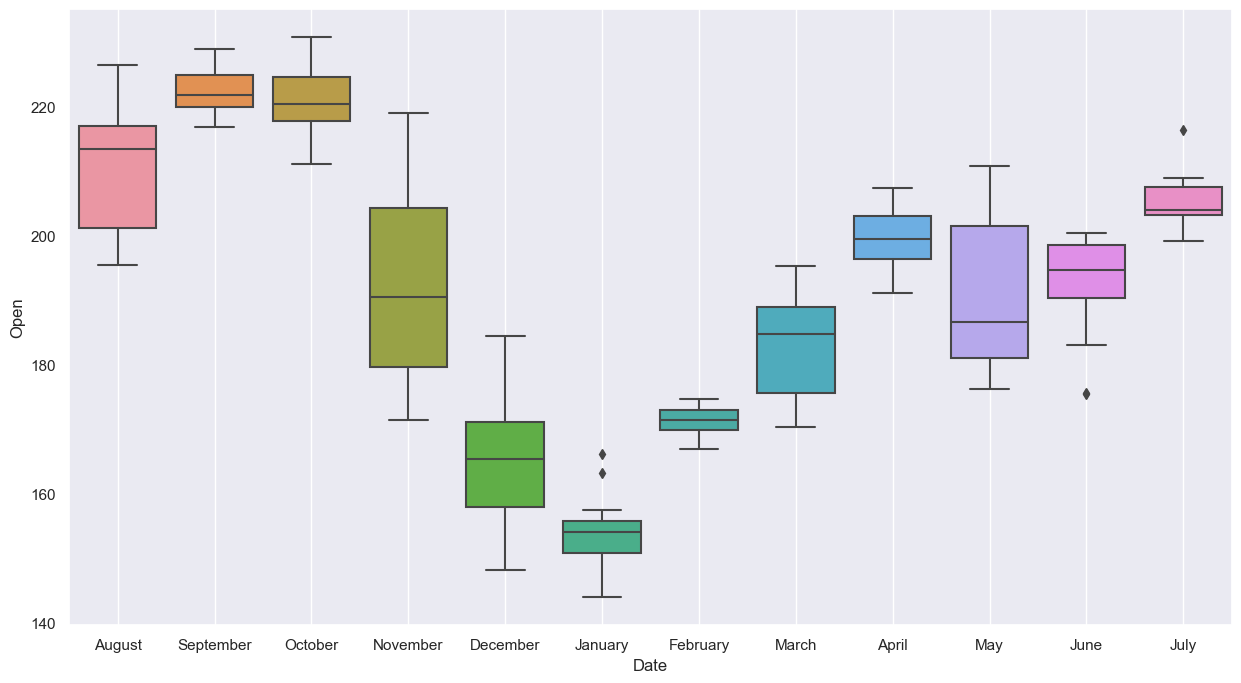

In [25]:
sns.boxplot(x = df_final.index.month_name(), y=df_final['Open'])
plt.grid()

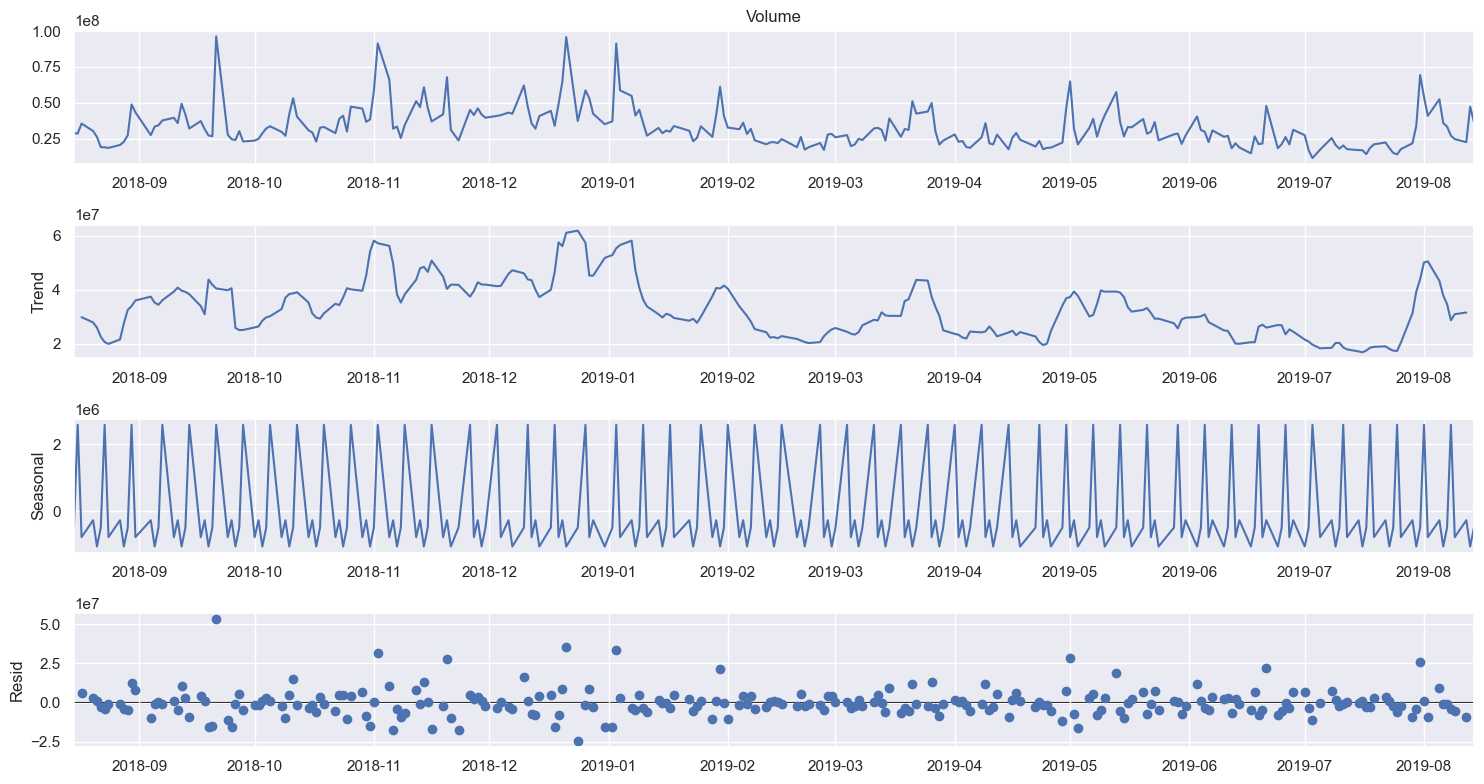

In [26]:
Decomposition = seasonal_decompose(df_final['Volume'],period = 5, model = 'additive')

Decomposition.plot();
plt.show()

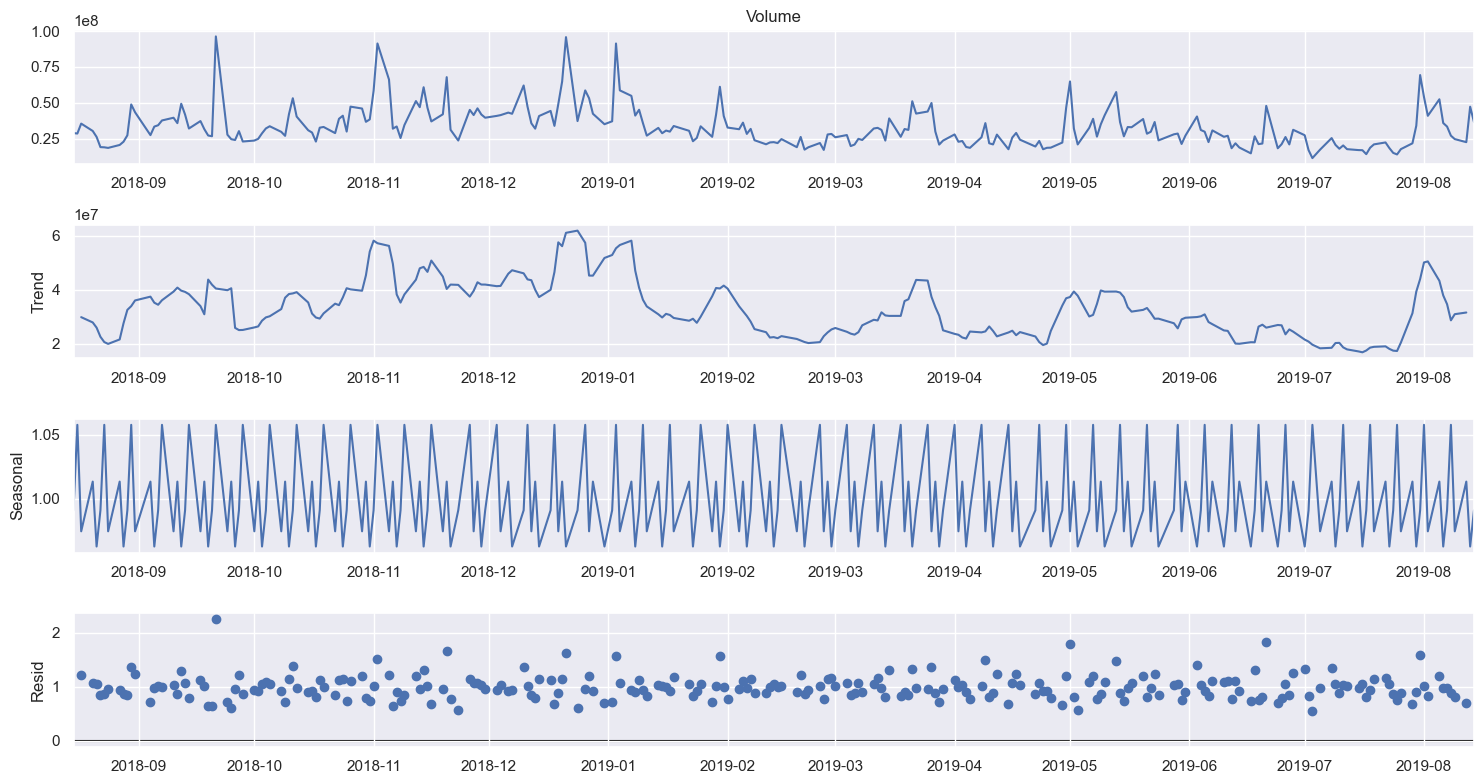

In [27]:
Decomposition = seasonal_decompose(df_final['Volume'],period = 5, model = 'multiplicative')

Decomposition.plot();
plt.show()

# So Series is additive 

In [28]:
trend = Decomposition.trend
seasonality = Decomposition.seasonal
residual = Decomposition.resid

print('Trend', '\n', trend.head(12),'\n')
print('seasonality', '\n', seasonality.head(12),'\n')
print('residual', '\n', residual.head(12),'\n')

Trend 
 Date
2018-08-15           NaN
2018-08-16           NaN
2018-08-17    29836500.0
2018-08-20    27878600.0
2018-08-21    25955160.0
2018-08-22    22565040.0
2018-08-23    20612520.0
2018-08-24    19935920.0
2018-08-27    21583260.0
2018-08-28    27565380.0
2018-08-29    32538120.0
2018-08-30    33911120.0
Name: trend, dtype: float64 

seasonality 
 Date
2018-08-15    0.991134
2018-08-16    1.057854
2018-08-17    0.974697
2018-08-20    1.013504
2018-08-21    0.962811
2018-08-22    0.991134
2018-08-23    1.057854
2018-08-24    0.974697
2018-08-27    1.013504
2018-08-28    0.962811
2018-08-29    0.991134
2018-08-30    1.057854
Name: seasonal, dtype: float64 

residual 
 Date
2018-08-15         NaN
2018-08-16         NaN
2018-08-17    1.218195
2018-08-20    1.071939
2018-08-21    1.046814
2018-08-22    0.850352
2018-08-23    0.866002
2018-08-24    0.950848
2018-08-27    0.938302
2018-08-28    0.858198
2018-08-29    0.845120
2018-08-30    1.360181
Name: resid, dtype: float64 



In [29]:
# split rhe data into training and testing before building the model

df.head()

Date        Open        High         Low       Close   Adj Close  \
0  8/15/2018  209.220001  210.740005  208.330002  210.240005  207.027420   
1  8/16/2018  211.750000  213.809998  211.470001  213.320007  210.060333   
2  8/17/2018  213.440002  217.949997  213.160004  217.580002  214.255234   
3  8/20/2018  218.100006  219.179993  215.110001  215.460007  212.167633   
4  8/21/2018  216.800003  217.190002  214.029999  215.039993  211.754028   

     Volume  
0  28807600  
1  28500400  
2  35427000  
3  30287700  
4  26159800

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [31]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    object        
 1   Open        251 non-null    float64       
 2   High        251 non-null    float64       
 3   Low         251 non-null    float64       
 4   Close       251 non-null    float64       
 5   Adj Close   251 non-null    float64       
 6   Volume      251 non-null    int64         
 7   Time_Stamp  251 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [33]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')

df_final_model

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   
...               ...         ...         ...         ...         ...   
2019-08-08   8/8/2019  200.199997  203.529999  199.389999  203.429993   
2019-08-09   8/9/2019  201.300003  202.759995  199.289993  200.990005   
2019-08-12  8/12/2019  199.619995  202.050003  199.149994  200.479996   
2019-08-13  8/13/2019  201.020004  212.139999  200.479996  208.970001   
2019-08-14  8/14/2019  203.160004  206.440002  202.589996  202.750000   

             Adj Close    Volume  
Time_Stamp                        
2018-08-15  207.027420  28807600  
2018-08-16  210.060333  28500400  
2018-08-17  214.255234  35427000  
2018-08-20  212.167633  30287700  
2018-08-21  211.754028  26159800  
...                ...       ...  
2019-08-08  202.659988  27009500  
2019-08-09  200.990005  24619700  
2019-08-12  200.479996  22474900  
2019-08-13  208.970001  47218500  
2019-08-14  202.750000  36453100  

[251 rows x 7 columns]

In [34]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2018-08-15  207.027420  28807600      8  2018  
2018-08-16  210.060333  28500400      8  2018  
2018-08-17  214.255234  35427000      8  2018  
2018-08-20  212.167633  30287700      8  2018  
2018-08-21  211.754028  26159800      8  2018

In [35]:
df_final_model.tail()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2019-08-08   8/8/2019  200.199997  203.529999  199.389999  203.429993   
2019-08-09   8/9/2019  201.300003  202.759995  199.289993  200.990005   
2019-08-12  8/12/2019  199.619995  202.050003  199.149994  200.479996   
2019-08-13  8/13/2019  201.020004  212.139999  200.479996  208.970001   
2019-08-14  8/14/2019  203.160004  206.440002  202.589996  202.750000   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2019-08-08  202.659988  27009500      8  2019  
2019-08-09  200.990005  24619700      8  2019  
2019-08-12  200.479996  22474900      8  2019  
2019-08-13  208.970001  47218500      8  2019  
2019-08-14  202.750000  36453100      8  2019

In [36]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-14')]
train.shape

(208, 9)

In [37]:
train.tail()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2019-06-07   6/7/2019  186.509995  191.919998  185.770004  190.149994   
2019-06-10  6/10/2019  191.809998  195.369995  191.619995  192.580002   
2019-06-11  6/11/2019  194.860001  196.000000  193.600006  194.809998   
2019-06-12  6/12/2019  193.949997  195.970001  193.389999  194.190002   
2019-06-13  6/13/2019  194.699997  196.789993  193.600006  194.149994   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2019-06-07  189.430267  30684400      6  2019  
2019-06-10  191.851074  26220900      6  2019  
2019-06-11  194.072632  26932900      6  2019  
2019-06-12  193.454987  18253200      6  2019  
2019-06-13  193.415115  21674600      6  2019

In [38]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-14')]
test.shape

(43, 9)

In [39]:
test.tail()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2019-08-08   8/8/2019  200.199997  203.529999  199.389999  203.429993   
2019-08-09   8/9/2019  201.300003  202.759995  199.289993  200.990005   
2019-08-12  8/12/2019  199.619995  202.050003  199.149994  200.479996   
2019-08-13  8/13/2019  201.020004  212.139999  200.479996  208.970001   
2019-08-14  8/14/2019  203.160004  206.440002  202.589996  202.750000   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2019-08-08  202.659988  27009500      8  2019  
2019-08-09  200.990005  24619700      8  2019  
2019-08-12  200.479996  22474900      8  2019  
2019-08-13  208.970001  47218500      8  2019  
2019-08-14  202.750000  36453100      8  2019

In [40]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [41]:
print(train_final.shape)
print(test_final.shape)

(208, 1)
(43, 1)


In [42]:
train_final.head()

Volume
Time_Stamp          
2018-08-15  28807600
2018-08-16  28500400
2018-08-17  35427000
2018-08-20  30287700
2018-08-21  26159800

In [43]:
test_final.tail()

Volume
Time_Stamp          
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

# check for stationarity of the Series at alpha = 0.05 using appropriate statistical tests

In [44]:
# Test for stationarity of the series - Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & Standard Deviation")
    plt.show(block=False)
    
    # Perform Dickey Fuller Test:
    print("Results of Dickey - Fuller Test :")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used',
                                            'No of Observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput, '\n')

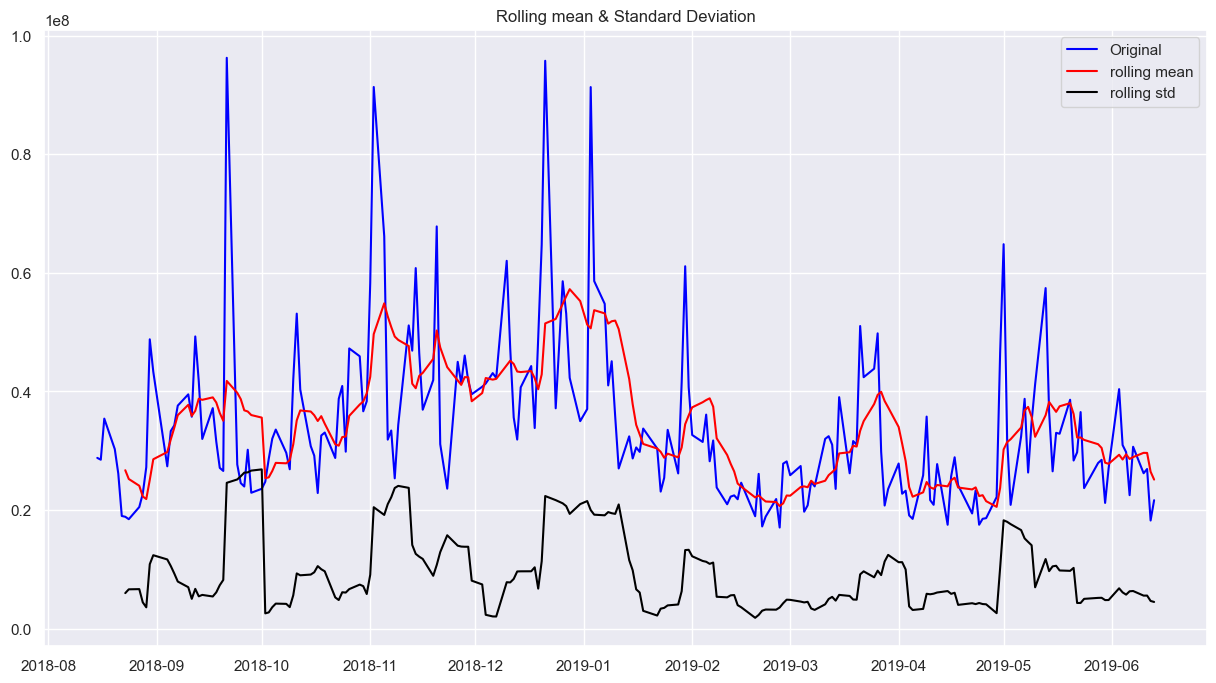

Results of Dickey - Fuller Test :
Test Statistic             -2.864792
p-value                     0.049598
#Lags used                  6.000000
No of Observation used    201.000000
Critical value (1%)        -3.463309
Critical value (5%)        -2.876029
Critical value (10%)       -2.574493
dtype: float64 



In [45]:
test_stationarity(train_final['Volume'])

# Series is Stationary at 5% alpha as per Dickey Fuller Test

In [46]:
import itertools

p = q = range(0,3)
d = range(0,1) 
pdq = list(itertools.product(p,d,q))

model_pdq = [(x[0], x[1],x[2]) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for model...')

print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

Examples of parameter combinations for model...
Model : (0, 0, 1)(0, 0, 1)
Model : (0, 0, 1)(0, 0, 2)
Model : (0, 0, 2)(1, 0, 0)
Model : (0, 0, 2)(1, 0, 1)
Model : (0, 0, 1)(1, 0, 2)


# Build an ARIMA Model

In [47]:
# creating an empty DataFrame with column names only

dfObj = pd.DataFrame(columns = ['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [48]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    mod = ARIMA(train_final['Volume'], order=param)
    results_Arima = mod.fit()
    print("ARIMA{} - AIC:{}".format(param, results_Arima.aic))
    dfObj = dfObj.append({'param':param, 'AIC':results_Arima.aic}, ignore_index=True)
    

ARIMA(0, 0, 0) - AIC:8332.739978519614
ARIMA(0, 0, 1) - AIC:7384.608245529029
ARIMA(0, 0, 2) - AIC:7379.130340788781
ARIMA(1, 0, 0) - AIC:7372.0748963861715
ARIMA(1, 0, 1) - AIC:7373.194529993945


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

ARIMA(1, 0, 2) - AIC:7366.068758420848
ARIMA(2, 0, 0) - AIC:7373.701699527671
ARIMA(2, 0, 1) - AIC:7367.221284403793


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

ARIMA(2, 0, 2) - AIC:7367.96865863057


In [49]:
dfObj.sort_values(by = ['AIC'])

param          AIC
5  (1, 0, 2)  7366.068758
7  (2, 0, 1)  7367.221284
8  (2, 0, 2)  7367.968659
3  (1, 0, 0)  7372.074896
4  (1, 0, 1)  7373.194530
6  (2, 0, 0)  7373.701700
2  (0, 0, 2)  7379.130341
1  (0, 0, 1)  7384.608246
0  (0, 0, 0)  8332.739979

In [50]:
# ARIMA(1,0,2) has the lowest AIC

mod = ARIMA(train_final['Volume'], order=(1,0,2))
results_Arima= mod.fit()
print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  208
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -3678.034
Date:                Mon, 29 Jul 2024   AIC                           7366.069
Time:                        20:45:41   BIC                           7382.756
Sample:                             0   HQIC                          7372.816
                                - 208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.434e+07   3.04e-10   1.13e+17      0.000    3.43e+07    3.43e+07
ar.L1          0.9466      0.044     21.495      0.000       0.860       1.033
ma.L1         -0.5248      0.067     -7.841      0.0

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [51]:
final_hat_avg = test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.732295e+07
209    2.869386e+07
210    2.899492e+07
211    2.927991e+07
212    2.954969e+07
213    2.980508e+07
214    3.004684e+07
215    3.027570e+07
216    3.049235e+07
217    3.069743e+07
218    3.089158e+07
219    3.107536e+07
220    3.124934e+07
221    3.141403e+07
222    3.156994e+07
223    3.171752e+07
224    3.185723e+07
225    3.198949e+07
226    3.211469e+07
227    3.223320e+07
228    3.234540e+07
229    3.245160e+07
230    3.255214e+07
231    3.264732e+07
232    3.273741e+07
233    3.282270e+07
234    3.290344e+07
235    3.297987e+07
236    3.305222e+07
237    3.312071e+07
238    3.318554e+07
239    3.324692e+07
240    3.330502e+07
241    3.336002e+07
242    3.341208e+07
243    3.346137e+07
244    3.350803e+07
245    3.355220e+07
246    3.359401e+07
247    3.363359e+07
248    3.367105e+07
249    3.370652e+07
250    3.374010e+07
Name: predicted_mean, dtype: float64

In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_ARIMA, squared=False))
print(rmse)

3663.273026312301


In [53]:
resultDf = pd.DataFrame({'Test RMSE': rmse}, index = ['ARIMA(1,0,2)'])
resultDf

Test RMSE
ARIMA(1,0,2)  3663.273026

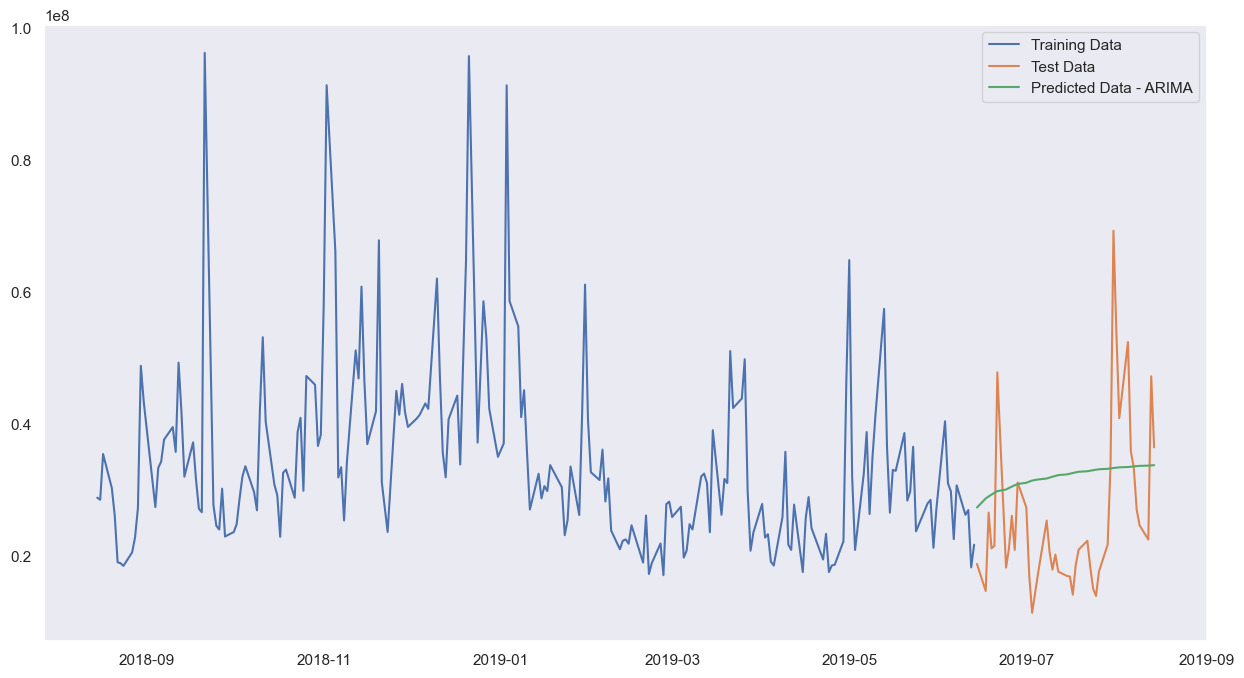

In [54]:
plt.plot(train_final,label = 'Training Data')
plt.plot(test_final,label = 'Test Data')
plt.plot(test_final.index, pred_ARIMA,label = 'Predicted Data - ARIMA')

plt.legend(loc = 'best')
plt.grid()

# Build SARIMA Model

In [55]:
dfObj2 = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [56]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=param, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 0)x(0, 0, 0)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 2)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(1, 0, 0)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(1, 0, 1)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(1, 0, 2)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(2, 0, 0)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(2, 0, 1)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(2, 0, 2)7 - AIC:7803.902158390863
SARIMA(0, 0, 1)x(0, 0, 0)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(0, 0, 1)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(0, 0, 2)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(1, 0, 0)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(1, 0, 1)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(1, 0, 2)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(2, 0, 0)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(2, 0, 1)7 - AIC:7643.903618065271
SARIMA(0, 0, 1)x(2, 0, 2)7 - AIC:7643.903618065271
SARIMA(0, 0, 2)x(0, 0, 0)7 - AIC:7579.195547009648
SARIMA(0, 0, 2)x(0, 0, 1)7 - AI

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 2)x(1, 0, 2)7 - AIC:7579.195547009648
SARIMA(0, 0, 2)x(2, 0, 0)7 - AIC:7579.195547009648
SARIMA(0, 0, 2)x(2, 0, 1)7 - AIC:7579.195547009648
SARIMA(0, 0, 2)x(2, 0, 2)7 - AIC:7579.195547009648
SARIMA(1, 0, 0)x(0, 0, 0)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 1)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 2)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(1, 0, 0)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(1, 0, 1)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(1, 0, 2)7 - AIC:7387.116568320252


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 0)x(2, 0, 0)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(2, 0, 1)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(2, 0, 2)7 - AIC:7387.116568320252
SARIMA(1, 0, 1)x(0, 0, 0)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(0, 0, 1)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(0, 0, 2)7 - AIC:7312.772230021368


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 1)x(1, 0, 0)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(1, 0, 1)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(1, 0, 2)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(2, 0, 0)7 - AIC:7312.772230021368
SARIMA(1, 0, 1)x(2, 0, 1)7 - AIC:7312.772230021368


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 1)x(2, 0, 2)7 - AIC:7312.772230021368
SARIMA(1, 0, 2)x(0, 0, 0)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(0, 0, 1)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(0, 0, 2)7 - AIC:7263.706658173942


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 2)x(1, 0, 0)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(1, 0, 1)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(1, 0, 2)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(2, 0, 0)7 - AIC:7263.706658173942


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 2)x(2, 0, 1)7 - AIC:7263.706658173942
SARIMA(1, 0, 2)x(2, 0, 2)7 - AIC:7263.706658173942
SARIMA(2, 0, 0)x(0, 0, 0)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 1)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 2)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(1, 0, 0)7 - AIC:7340.223467609073


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 0)x(1, 0, 1)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(1, 0, 2)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(2, 0, 0)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(2, 0, 1)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(2, 0, 2)7 - AIC:7340.223467609073
SARIMA(2, 0, 1)x(0, 0, 0)7 - AIC:7768.726542864979


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(0, 0, 1)7 - AIC:7768.726542864979
SARIMA(2, 0, 1)x(0, 0, 2)7 - AIC:7768.726542864979
SARIMA(2, 0, 1)x(1, 0, 0)7 - AIC:7768.726542864979
SARIMA(2, 0, 1)x(1, 0, 1)7 - AIC:7768.726542864979


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(1, 0, 2)7 - AIC:7768.726542864979
SARIMA(2, 0, 1)x(2, 0, 0)7 - AIC:7768.726542864979
SARIMA(2, 0, 1)x(2, 0, 1)7 - AIC:7768.726542864979


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(2, 0, 2)7 - AIC:7768.726542864979
SARIMA(2, 0, 2)x(0, 0, 0)7 - AIC:7265.50312615961


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1)7 - AIC:7265.50312615961
SARIMA(2, 0, 2)x(0, 0, 2)7 - AIC:7265.50312615961
SARIMA(2, 0, 2)x(1, 0, 0)7 - AIC:7265.50312615961


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 2)x(1, 0, 1)7 - AIC:7265.50312615961
SARIMA(2, 0, 2)x(1, 0, 2)7 - AIC:7265.50312615961


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0)7 - AIC:7265.50312615961
SARIMA(2, 0, 2)x(2, 0, 1)7 - AIC:7265.50312615961
SARIMA(2, 0, 2)x(2, 0, 2)7 - AIC:7265.50312615961


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [57]:
dfObj2.sort_values(by=['AIC'])

param   seasonal          AIC
49  (1, 0, 2)  (1, 0, 1)  7263.706658
45  (1, 0, 2)  (0, 0, 0)  7263.706658
46  (1, 0, 2)  (0, 0, 1)  7263.706658
47  (1, 0, 2)  (0, 0, 2)  7263.706658
48  (1, 0, 2)  (1, 0, 0)  7263.706658
..        ...        ...          ...
5   (0, 0, 0)  (1, 0, 2)  7803.902158
6   (0, 0, 0)  (2, 0, 0)  7803.902158
7   (0, 0, 0)  (2, 0, 1)  7803.902158
4   (0, 0, 0)  (1, 0, 1)  7803.902158
0   (0, 0, 0)  (0, 0, 0)  7803.902158

[81 rows x 3 columns]

In [58]:
# (1, 0, 2)(0, 0, 2, 5) 6914.849724
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Mon, 29 Jul 2024   AIC                           6914.850
Time:                                   20:45:45   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.653      0.000       0.990       1.007
ma.L1         -0.5660      0.056    -10.018

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



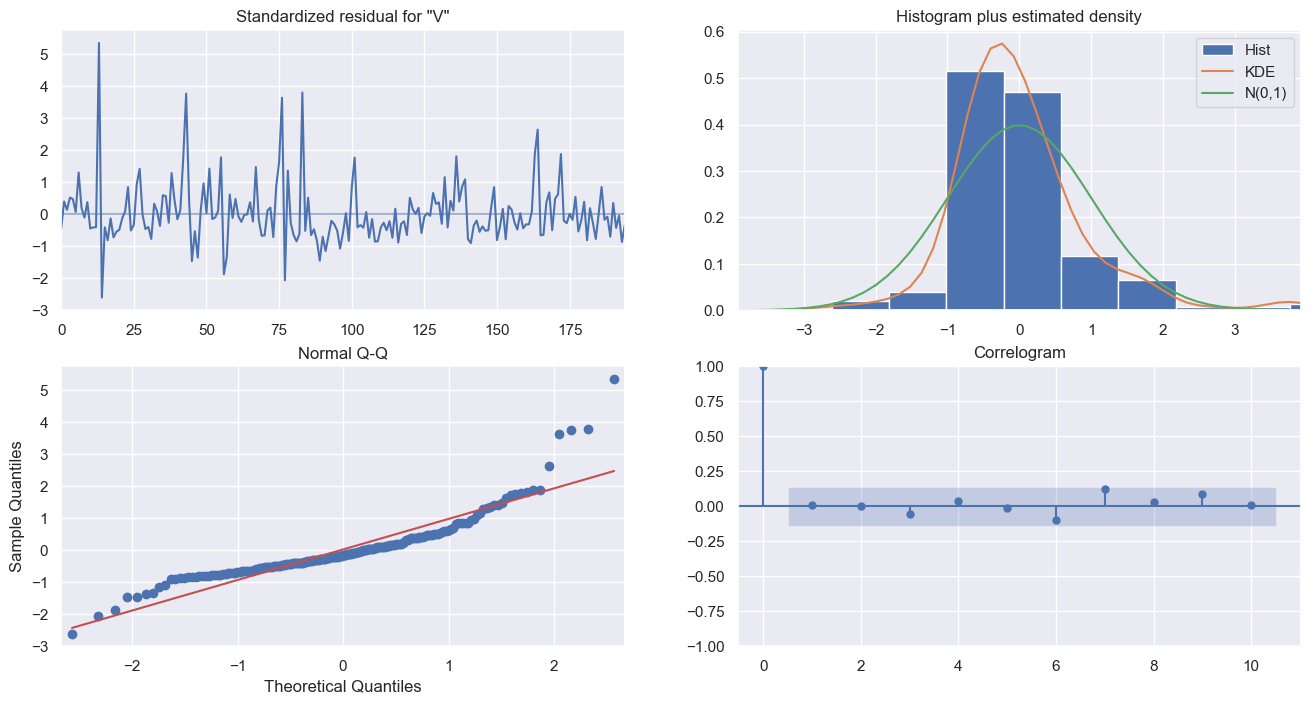

In [59]:
results_SARIMA.plot_diagnostics(figsize = (16,8))
plt.show()

In [60]:
final_hat_avg = test_final.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.550960e+07
209    2.511540e+07
210    2.604707e+07
211    2.665686e+07
212    2.748453e+07
213    2.606077e+07
214    2.666410e+07
215    2.645792e+07
216    2.754557e+07
217    2.723319e+07
218    2.655365e+07
219    2.637878e+07
220    2.633595e+07
221    2.629319e+07
222    2.625050e+07
223    2.620788e+07
224    2.616533e+07
225    2.612284e+07
226    2.608043e+07
227    2.603808e+07
228    2.599581e+07
229    2.595360e+07
230    2.591146e+07
231    2.586939e+07
232    2.582739e+07
233    2.578545e+07
234    2.574359e+07
235    2.570179e+07
236    2.566006e+07
237    2.561840e+07
238    2.557680e+07
239    2.553527e+07
240    2.549381e+07
241    2.545242e+07
242    2.541109e+07
243    2.536984e+07
244    2.532864e+07
245    2.528752e+07
246    2.524646e+07
247    2.520547e+07
248    2.516455e+07
249    2.512369e+07
250    2.508290e+07
Name: predicted_mean, dtype: float64

In [61]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMA.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMA.predicted_mean)
print(rmse)
print(mape*100)

3547.7271873230693
38.10700790938629


In [62]:
resultDf1 = pd.DataFrame({'Test RMSE' : rmse}, index = ['SARIMA(1, 0, 2)	(0, 0, 2, 5) 6914.849724'])
resultDf1 = pd.concat([resultDf, resultDf1])
resultDf1

Test RMSE
ARIMA(1,0,2)                               3663.273026
SARIMA(1, 0, 2)\t(0, 0, 2, 5) 6914.849724  3547.727187

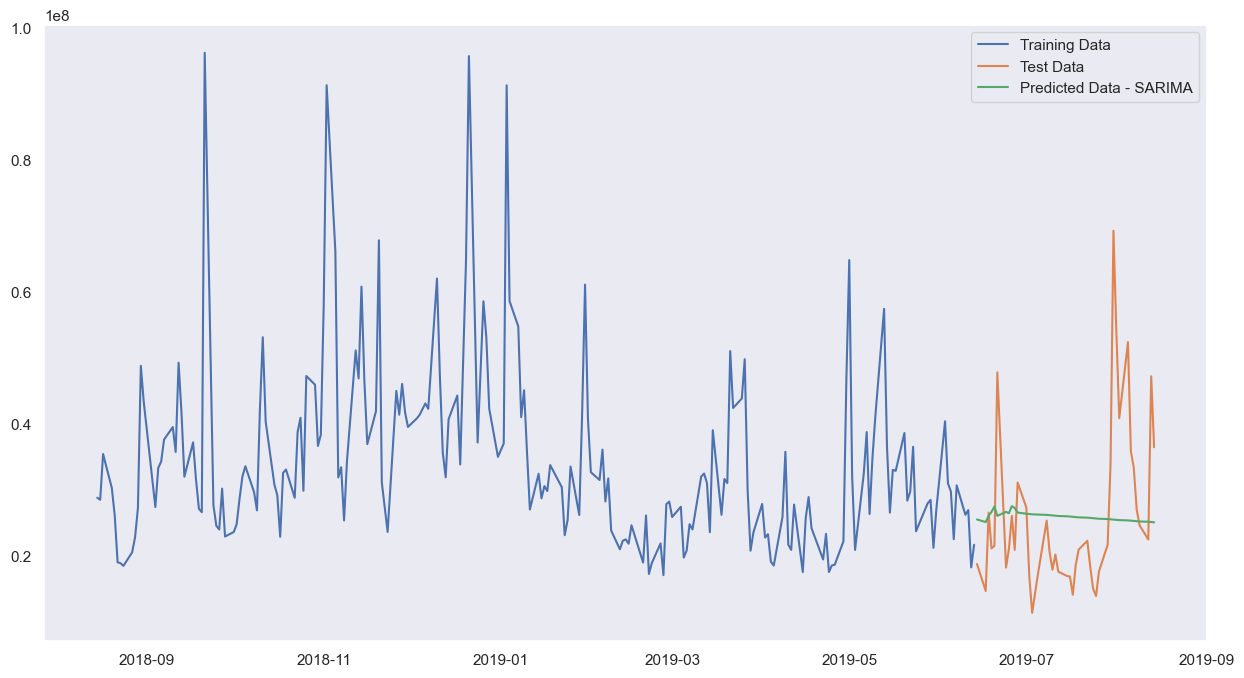

In [63]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Build a SARIMAX Model

In [64]:
train.head()

Date        Open        High         Low       Close  \
Time_Stamp                                                              
2018-08-15  8/15/2018  209.220001  210.740005  208.330002  210.240005   
2018-08-16  8/16/2018  211.750000  213.809998  211.470001  213.320007   
2018-08-17  8/17/2018  213.440002  217.949997  213.160004  217.580002   
2018-08-20  8/20/2018  218.100006  219.179993  215.110001  215.460007   
2018-08-21  8/21/2018  216.800003  217.190002  214.029999  215.039993   

             Adj Close    Volume  Month  Year  
Time_Stamp                                     
2018-08-15  207.027420  28807600      8  2018  
2018-08-16  210.060333  28500400      8  2018  
2018-08-17  214.255234  35427000      8  2018  
2018-08-20  212.167633  30287700      8  2018  
2018-08-21  211.754028  26159800      8  2018

In [65]:
ex_train = train[['Open', 'Close','High', 'Low']]
ex_test = test[['Open', 'Close','High', 'Low']]

In [66]:
dfObj3 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal_ex, AIC]
Index: []

In [67]:
# Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=param, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj3 = dfObj3.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 0)x(0, 0, 0)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(0, 0, 1)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(0, 0, 2)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(1, 0, 0)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(1, 0, 1)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(1, 0, 2)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(2, 0, 0)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(2, 0, 1)7 - AIC:8222.000318658585
SARIMA(0, 0, 0)x(2, 0, 2)7 - AIC:8222.000318658585
SARIMA(0, 0, 1)x(0, 0, 0)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(0, 0, 1)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(0, 0, 2)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(1, 0, 0)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(1, 0, 1)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(1, 0, 2)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(2, 0, 0)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(2, 0, 1)7 - AIC:7267.821420618302
SARIMA(0, 0, 1)x(2, 0, 2)7 - AIC:7267.821420618302


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 2)x(0, 0, 0)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(0, 0, 1)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(0, 0, 2)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(1, 0, 0)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(1, 0, 1)7 - AIC:7229.533063100773


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 2)x(1, 0, 2)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(2, 0, 0)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(2, 0, 1)7 - AIC:7229.533063100773
SARIMA(0, 0, 2)x(2, 0, 2)7 - AIC:7229.533063100773
SARIMA(1, 0, 0)x(0, 0, 0)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(0, 0, 1)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(0, 0, 2)7 - AIC:7293.5656231590965


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 0)x(1, 0, 0)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(1, 0, 1)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(1, 0, 2)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(2, 0, 0)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(2, 0, 1)7 - AIC:7293.5656231590965
SARIMA(1, 0, 0)x(2, 0, 2)7 - AIC:7293.5656231590965
SARIMA(1, 0, 1)x(0, 0, 0)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(0, 0, 1)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(0, 0, 2)7 - AIC:7250.235476687209


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(1, 0, 1)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(1, 0, 2)7 - AIC:7250.235476687209


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 1)x(2, 0, 0)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(2, 0, 1)7 - AIC:7250.235476687209
SARIMA(1, 0, 1)x(2, 0, 2)7 - AIC:7250.235476687209


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 2)x(0, 0, 0)7 - AIC:7215.045132108904
SARIMA(1, 0, 2)x(0, 0, 1)7 - AIC:7215.045132108904


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2)7 - AIC:7215.045132108904
SARIMA(1, 0, 2)x(1, 0, 0)7 - AIC:7215.045132108904


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1)7 - AIC:7215.045132108904
SARIMA(1, 0, 2)x(1, 0, 2)7 - AIC:7215.045132108904


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0)7 - AIC:7215.045132108904
SARIMA(1, 0, 2)x(2, 0, 1)7 - AIC:7215.045132108904


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2)7 - AIC:7215.045132108904
SARIMA(2, 0, 0)x(0, 0, 0)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(0, 0, 1)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(0, 0, 2)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(1, 0, 0)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(1, 0, 1)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(1, 0, 2)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(2, 0, 0)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(2, 0, 1)7 - AIC:7257.081652358425
SARIMA(2, 0, 0)x(2, 0, 2)7 - AIC:7257.081652358425


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(0, 0, 0)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(0, 0, 1)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(0, 0, 2)7 - AIC:7249.445892553233


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(1, 0, 0)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(1, 0, 1)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(1, 0, 2)7 - AIC:7249.445892553233


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(2, 0, 0)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(2, 0, 1)7 - AIC:7249.445892553233
SARIMA(2, 0, 1)x(2, 0, 2)7 - AIC:7249.445892553233


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 2)x(0, 0, 0)7 - AIC:7217.0409231349295
SARIMA(2, 0, 2)x(0, 0, 1)7 - AIC:7217.0409231349295


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2)7 - AIC:7217.0409231349295
SARIMA(2, 0, 2)x(1, 0, 0)7 - AIC:7217.0409231349295


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1)7 - AIC:7217.0409231349295
SARIMA(2, 0, 2)x(1, 0, 2)7 - AIC:7217.0409231349295


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0)7 - AIC:7217.0409231349295
SARIMA(2, 0, 2)x(2, 0, 1)7 - AIC:7217.0409231349295


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 2)7 - AIC:7217.0409231349295


In [68]:
dfObj3.sort_values(by=['AIC'])

param seasonal_ex          AIC   seasonal
45  (1, 0, 2)         NaN  7215.045132  (0, 0, 0)
46  (1, 0, 2)         NaN  7215.045132  (0, 0, 1)
47  (1, 0, 2)         NaN  7215.045132  (0, 0, 2)
48  (1, 0, 2)         NaN  7215.045132  (1, 0, 0)
49  (1, 0, 2)         NaN  7215.045132  (1, 0, 1)
..        ...         ...          ...        ...
5   (0, 0, 0)         NaN  8222.000319  (1, 0, 2)
6   (0, 0, 0)         NaN  8222.000319  (2, 0, 0)
8   (0, 0, 0)         NaN  8222.000319  (2, 0, 2)
4   (0, 0, 0)         NaN  8222.000319  (1, 0, 1)
0   (0, 0, 0)         NaN  8222.000319  (0, 0, 0)

[81 rows x 4 columns]

In [69]:
# (1, 0, 2) NaN 6872.112334 (0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3426.056
Date:                           Mon, 29 Jul 2024   AIC                           6872.112
Time:                                   20:45:51   BIC                           6904.842
Sample:                                        0   HQIC                          6885.364
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open       -6.795e+04   2.07e+05     -0.328      0.743   -4.74e+05    3.38e+05
Close      -8.821e+05   2.04e+05     -4.315

In [70]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test )
pred_SARIMAX.predicted_mean

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.481981e+07
209    2.367062e+07
210    3.430940e+07
211    2.392994e+07
212    2.353840e+07
213    2.507268e+07
214    2.147018e+07
215    3.165646e+07
216    2.872497e+07
217    2.221615e+07
218    2.374675e+07
219    3.144629e+07
220    2.026153e+07
221    1.999669e+07
222    2.275706e+07
223    2.647972e+07
224    2.445092e+07
225    2.256570e+07
226    2.673248e+07
227    2.128489e+07
228    2.177257e+07
229    2.588457e+07
230    2.253519e+07
231    2.293056e+07
232    3.470426e+07
233    2.931543e+07
234    2.066437e+07
235    2.272660e+07
236    2.653935e+07
237    2.689658e+07
238    2.440568e+07
239    2.755133e+07
240    6.605676e+07
241    7.221166e+07
242    3.673617e+07
243    4.426443e+07
244    3.175462e+07
245    3.898463e+07
246    3.194330e+07
247    3.036419e+07
248    2.776487e+07
249    6.848062e+07
250    3.418385e+07
Name: predicted_mean, dtype: float64

In [71]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

2872.462807110646
29.227205551517738


In [72]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)NaN6872.112334 (0, 0, 2, 5)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

Test RMSE
(1, 0, 2)NaN6872.112334 (0, 0, 2, 5)  2872.462807

plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

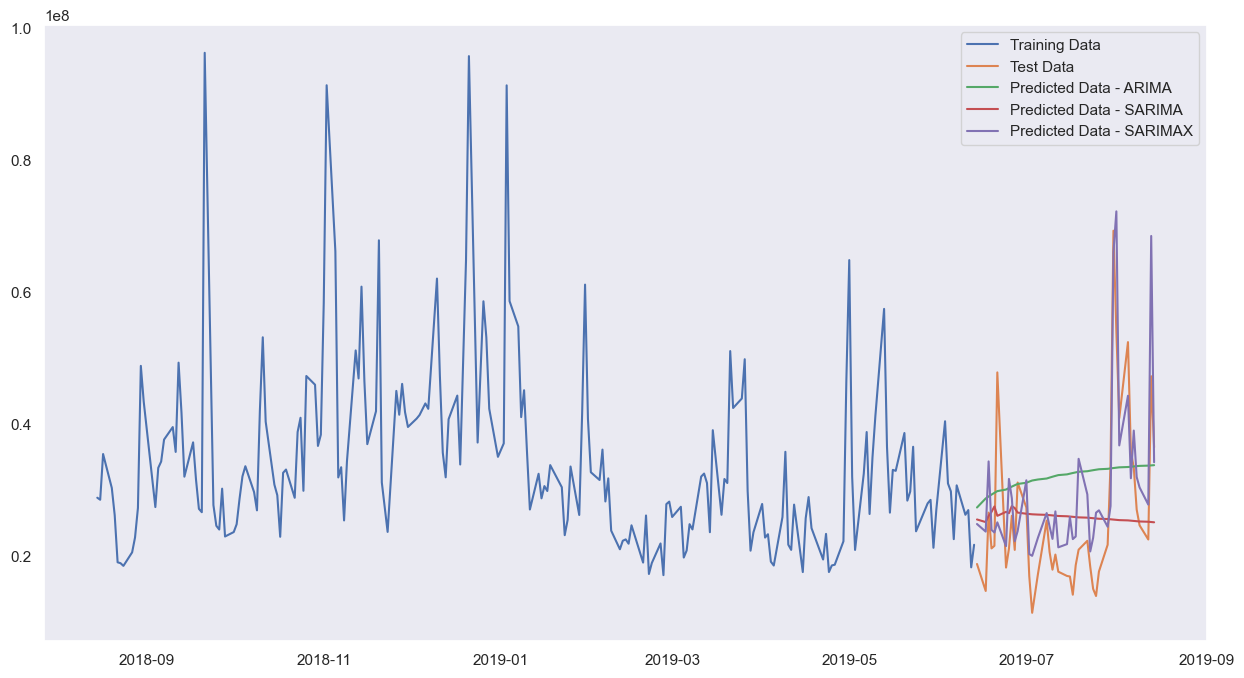

In [73]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

# Drop 'Open ','Close' columns and add 'Adj Close' to improve better rmse score

In [74]:
ex_train = train[['Adj Close','High', 'Low']]
ex_test = test[['Adj Close','High', 'Low']]

In [75]:
dfObj3 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal_ex, AIC]
Index: []

In [76]:
# Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=param, 
                                      enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj3 = dfObj3.append({'param': param, 'seasonal':param_seasonal, 
                               'AIC':results_SARIMA.aic}, ignore_index=True)

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 0)x(0, 0, 0)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(0, 0, 1)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(0, 0, 2)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(1, 0, 0)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(1, 0, 1)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(1, 0, 2)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(2, 0, 0)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(2, 0, 1)7 - AIC:8220.966803816667
SARIMA(0, 0, 0)x(2, 0, 2)7 - AIC:8220.966803816667
SARIMA(0, 0, 1)x(0, 0, 0)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(0, 0, 1)7 - AIC:7266.170910989798


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 1)x(0, 0, 2)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(1, 0, 0)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(1, 0, 1)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(1, 0, 2)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(2, 0, 0)7 - AIC:7266.170910989798
SARIMA(0, 0, 1)x(2, 0, 1)7 - AIC:7266.170910989798


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 1)x(2, 0, 2)7 - AIC:7266.170910989798
SARIMA(0, 0, 2)x(0, 0, 0)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(0, 0, 1)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(0, 0, 2)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(1, 0, 0)7 - AIC:7227.944634272546


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(0, 0, 2)x(1, 0, 1)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(1, 0, 2)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(2, 0, 0)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(2, 0, 1)7 - AIC:7227.944634272546
SARIMA(0, 0, 2)x(2, 0, 2)7 - AIC:7227.944634272546
SARIMA(1, 0, 0)x(0, 0, 0)7 - AIC:7291.8764433545475


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 0)x(0, 0, 1)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(0, 0, 2)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(1, 0, 0)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(1, 0, 1)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(1, 0, 2)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(2, 0, 0)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(2, 0, 1)7 - AIC:7291.8764433545475
SARIMA(1, 0, 0)x(2, 0, 2)7 - AIC:7291.8764433545475
SARIMA(1, 0, 1)x(0, 0, 0)7 - AIC:7248.721617717025


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1)7 - AIC:7248.721617717025
SARIMA(1, 0, 1)x(0, 0, 2)7 - AIC:7248.721617717025


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0)7 - AIC:7248.721617717025
SARIMA(1, 0, 1)x(1, 0, 1)7 - AIC:7248.721617717025
SARIMA(1, 0, 1)x(1, 0, 2)7 - AIC:7248.721617717025


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 1)x(2, 0, 0)7 - AIC:7248.721617717025
SARIMA(1, 0, 1)x(2, 0, 1)7 - AIC:7248.721617717025
SARIMA(1, 0, 1)x(2, 0, 2)7 - AIC:7248.721617717025


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 0)7 - AIC:7213.168730840724
SARIMA(1, 0, 2)x(0, 0, 1)7 - AIC:7213.168730840724


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2)7 - AIC:7213.168730840724
SARIMA(1, 0, 2)x(1, 0, 0)7 - AIC:7213.168730840724
SARIMA(1, 0, 2)x(1, 0, 1)7 - AIC:7213.168730840724


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 2)x(1, 0, 2)7 - AIC:7213.168730840724
SARIMA(1, 0, 2)x(2, 0, 0)7 - AIC:7213.168730840724
SARIMA(1, 0, 2)x(2, 0, 1)7 - AIC:7213.168730840724


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(1, 0, 2)x(2, 0, 2)7 - AIC:7213.168730840724
SARIMA(2, 0, 0)x(0, 0, 0)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(0, 0, 1)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(0, 0, 2)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(1, 0, 0)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(1, 0, 1)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(1, 0, 2)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(2, 0, 0)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(2, 0, 1)7 - AIC:7255.750383394738
SARIMA(2, 0, 0)x(2, 0, 2)7 - AIC:7255.750383394738


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(0, 0, 0)7 - AIC:7247.608944301799
SARIMA(2, 0, 1)x(0, 0, 1)7 - AIC:7247.608944301799
SARIMA(2, 0, 1)x(0, 0, 2)7 - AIC:7247.608944301799


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(1, 0, 0)7 - AIC:7247.608944301799
SARIMA(2, 0, 1)x(1, 0, 1)7 - AIC:7247.608944301799


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2)7 - AIC:7247.608944301799
SARIMA(2, 0, 1)x(2, 0, 0)7 - AIC:7247.608944301799
SARIMA(2, 0, 1)x(2, 0, 1)7 - AIC:7247.608944301799


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date inde

SARIMA(2, 0, 1)x(2, 0, 2)7 - AIC:7247.608944301799
SARIMA(2, 0, 2)x(0, 0, 0)7 - AIC:7215.163633897982


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 1)7 - AIC:7215.163633897982
SARIMA(2, 0, 2)x(0, 0, 2)7 - AIC:7215.163633897982


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0)7 - AIC:7215.163633897982
SARIMA(2, 0, 2)x(1, 0, 1)7 - AIC:7215.163633897982


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2)7 - AIC:7215.163633897982
SARIMA(2, 0, 2)x(2, 0, 0)7 - AIC:7215.163633897982


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1)7 - AIC:7215.163633897982
SARIMA(2, 0, 2)x(2, 0, 2)7 - AIC:7215.163633897982


C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [77]:
dfObj3.sort_values(by=['AIC'])

param seasonal_ex          AIC   seasonal
45  (1, 0, 2)         NaN  7213.168731  (0, 0, 0)
46  (1, 0, 2)         NaN  7213.168731  (0, 0, 1)
47  (1, 0, 2)         NaN  7213.168731  (0, 0, 2)
48  (1, 0, 2)         NaN  7213.168731  (1, 0, 0)
49  (1, 0, 2)         NaN  7213.168731  (1, 0, 1)
..        ...         ...          ...        ...
5   (0, 0, 0)         NaN  8220.966804  (1, 0, 2)
6   (0, 0, 0)         NaN  8220.966804  (2, 0, 0)
8   (0, 0, 0)         NaN  8220.966804  (2, 0, 2)
4   (0, 0, 0)         NaN  8220.966804  (1, 0, 1)
0   (0, 0, 0)         NaN  8220.966804  (0, 0, 0)

[81 rows x 4 columns]

In [78]:
# (1, 0, 2) NaN 6872.112334 (0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'], exog=ex_train,
                                        order=(1,0,2),
                                       seasonal_order=(0,0,2,5), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                     
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3426.144
Date:                           Mon, 29 Jul 2024   AIC                           6870.288
Time:                                   20:45:57   BIC                           6899.745
Sample:                                        0   HQIC                          6882.215
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close  -5.858e+05   3.13e+05     -1.874      0.061    -1.2e+06     2.7e+04
High        5.139e+06   3.32e+05     15.480

In [79]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test )
pred_SARIMAX.predicted_mean

C:\Users\NADIR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.492793e+07
209    2.358383e+07
210    3.420042e+07
211    2.356983e+07
212    2.342064e+07
213    2.458541e+07
214    2.100013e+07
215    3.088480e+07
216    2.848119e+07
217    2.163361e+07
218    2.332704e+07
219    3.076342e+07
220    1.997724e+07
221    1.983579e+07
222    2.236009e+07
223    2.612450e+07
224    2.424982e+07
225    2.222069e+07
226    2.586523e+07
227    2.081706e+07
228    2.129220e+07
229    2.523923e+07
230    2.175361e+07
231    2.258704e+07
232    3.362795e+07
233    2.911513e+07
234    2.033405e+07
235    2.224898e+07
236    2.569132e+07
237    2.598987e+07
238    2.373928e+07
239    2.690651e+07
240    6.416158e+07
241    7.018604e+07
242    3.611000e+07
243    4.300623e+07
244    3.136823e+07
245    3.885227e+07
246    3.172463e+07
247    2.922197e+07
248    2.652665e+07
249    6.746543e+07
250    3.237018e+07
Name: predicted_mean, dtype: float64

In [80]:
rmse = sqrt(mean_squared_error(test_final.Volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.Volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

2818.9197163212743
27.565470640044126


In [81]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(1, 0, 2)NaN6872.112334 (0, 0, 2, 5)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

Test RMSE
(1, 0, 2)NaN6872.112334 (0, 0, 2, 5)  2818.919716

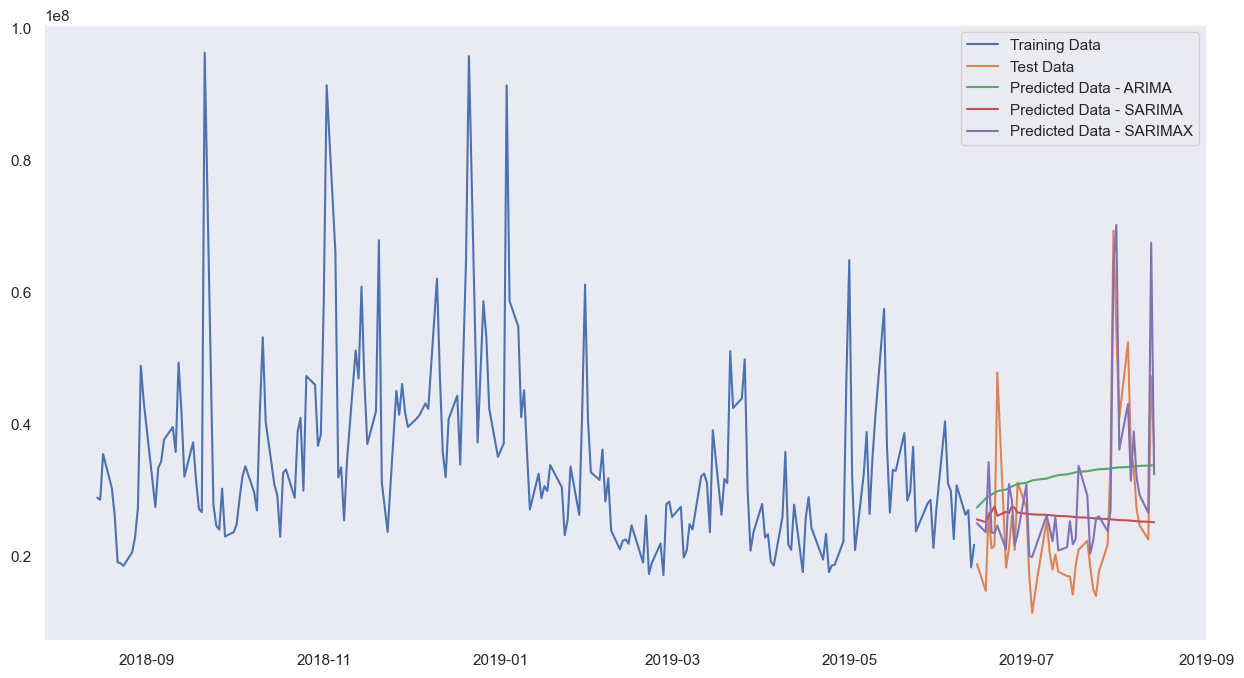

In [82]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();